In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
import time
import datetime
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter


df = pd.read_csv('C:\\Users\\maria\\Desktop\\MyJupyter\\BoardGames\\bgg_db_2018_01.csv',encoding = "ISO-8859-1")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
df = df.drop(['game_id','bgg_url','image_url','rank','geek_rating','min_time','max_time', 'year'],axis=1)
df.avg_rating = df.avg_rating.astype(int)
# Eliminar filas con valores 0
df = df.drop(df[df.min_players == 0].index)
df = df.drop(df[df.age <= 0].index)
df = df.drop(df[df.weight < 0].index)
df = df.drop(df[df.avg_time <= 0].index)
df = df.drop(df[df.avg_rating <=0].index)
df.head()

,names,min_players,max_players,avg_time,avg_rating,num_votes,age,mechanic,owned,category,designer,weight
0,Gloomhaven,1,4,150,9,9841,12,"Action / Movement Programming, Co-operative Pl...",18217,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7720
1,Pandemic Legacy: Season 1,2,4,60,8,23489,13,"Action Point Allowance System, Co-operative Pl...",38105,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8056
2,Through the Ages: A New Story of Civilization,2,4,240,8,10679,14,"Action Point Allowance System, Auction/Bidding...",14147,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3538
3,Twilight Struggle,2,2,180,8,29923,13,"Area Control / Area Influence, Campaign / Batt...",41094,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5446
4,Terraforming Mars,1,5,120,8,20468,12,"Card Drafting, Hand Management, Tile Placement...",26145,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2465


In [49]:
df.describe()

,min_players,max_players,avg_time,avg_rating,num_votes,age,owned,weight
count,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000,4745.000000
mean,2.035616,5.455638,108.234563,6.440042,1980.110432,10.869758,2989.987987,2.332006
std,0.667699,16.417822,452.348458,0.601641,4620.826973,2.396487,6274.498921,0.796912
min,1.000000,0.000000,1.000000,5.000000,55.000000,2.000000,46.000000,0.000000
25%,2.000000,4.000000,30.000000,6.000000,282.000000,10.000000,609.000000,1.727300
50%,2.000000,4.000000,60.000000,6.000000,617.000000,12.000000,1176.000000,2.273400
75%,2.000000,6.000000,90.000000,7.000000,1619.000000,12.000000,2696.000000,2.857100
max,8.000000,999.000000,22500.000000,9.000000,74261.000000,42.000000,106608.000000,4.904800


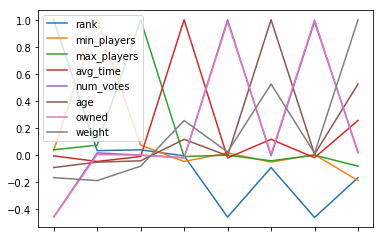

In [5]:
df.corr().plot()

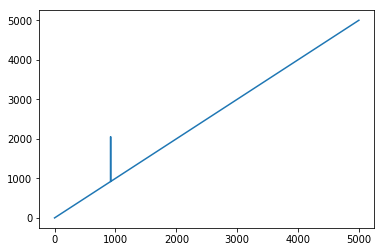

In [5]:
df['rank'].plot()

In [26]:
all_categories = ""

for x in range(0, len(df)):
    all_categories += df.iloc[x]['category']

tokenizer = RegexpTokenizer(r'\w+')
categories_no_punc = tokenizer.tokenize(all_categories.lower())
word_count_dict = Counter(w for w in categories_no_punc)
print(len(word_count_dict))

1669


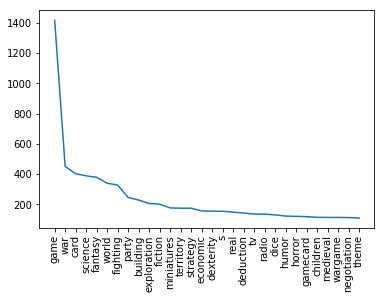

In [29]:
cwords = word_count_dict.most_common(30)
labels, values = zip(*cwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

In [27]:
all_mechanics = ""

for x in range(0, len(df)):
    all_mechanics += df.iloc[x]['mechanic']

tokenizer = RegexpTokenizer(r'\w+')
mechanics_no_punc = tokenizer.tokenize(all_mechanics.lower())
mechanics_count_dict = Counter(w for w in mechanics_no_punc)
print(mechanics_count_dict)
print(len(mechanics_count_dict))

Counter({'rolling': 1144, 'management': 1020, 'player': 983, 'variable': 952, 'area': 899, 'point': 877, 'movement': 848, 'hand': 847, 'and': 738, 'dice': 699, 'set': 651, 'control': 616, 'influence': 596, 'drafting': 569, 'building': 491, 'tile': 463, 'modular': 462, 'system': 442, 'board': 434, 'action': 382, 'card': 380, 'allowance': 378, 'collection': 357, 'operative': 346, 'simultaneous': 338, 'bidding': 335, 'play': 315, 'worker': 287, 'pool': 263, 'to': 261, 'network': 253, 'hex': 240, 'your': 217, 'route': 215, 'grid': 208, 'press': 192, 'counter': 188, 'up': 177, 'battle': 170, 'take': 169, 'deck': 167, 'partnerships': 161, 'unit': 158, 'driven': 156, 'secret': 153, 'pick': 150, 'deliver': 149, 'pattern': 144, 'selection': 141, 'luck': 140, 'role': 138, 'phase': 134, 'playing': 124, 'powersarea': 124, 'placementarea': 124, 'placement': 119, 'programming': 118, 'elimination': 118, 'co': 117, 'stock': 105, 'spin': 105, 'memory': 101, 'powersdice': 100, 'auction': 95, 'roll': 90,

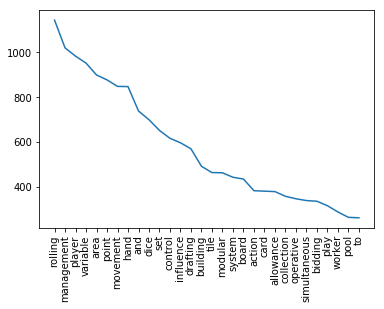

In [28]:
mwords = mechanics_count_dict.most_common(30)
labels, values = zip(*mwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

In [58]:
dr = df[df['avg_rating']>8]
all_mechanics = ""

for x in range(0, len(dr)):
    all_mechanics += dr.iloc[x]['mechanic']

tokenizer = RegexpTokenizer(r'\w+')
mechanics_no_punc = tokenizer.tokenize(all_mechanics.lower())
mechanics_count_dict = Counter(w for w in mechanics_no_punc)
print(mechanics_count_dict)
print(len(mechanics_count_dict))

Counter({'variable': 6, 'player': 6, 'movement': 5, 'area': 4, 'dice': 4, 'rolling': 4, 'modular': 3, 'board': 3, 'card': 3, 'action': 2, 'co': 2, 'operative': 2, 'play': 2, 'hand': 2, 'management': 2, 'role': 2, 'playing': 2, 'powers': 2, 'battle': 2, 'driven': 2, 'programming': 1, 'grid': 1, 'simultaneous': 1, 'selection': 1, 'storytelling': 1, 'powersarea': 1, 'control': 1, 'influence': 1, 'impulse': 1, 'hex': 1, 'and': 1, 'counter': 1, 'set': 1, 'collection': 1, 'trading': 1, 'phase': 1, 'order': 1, 'votingarea': 1, 'campaign': 1, 'drafting': 1, 'elimination': 1, 'powerscampaign': 1, 'powersaction': 1, 'point': 1, 'allowance': 1, 'system': 1})
46


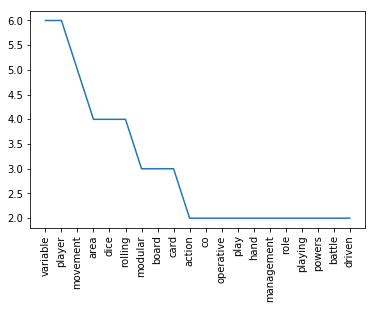

In [64]:
mwords = mechanics_count_dict.most_common(20)
labels, values = zip(*mwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

In [68]:
all_categories = ""

for x in range(0, len(dr)):
    all_categories += dr.iloc[x]['category']

tokenizer = RegexpTokenizer(r'\w+')
categories_no_punc = tokenizer.tokenize(all_categories.lower())
word_count_dict = Counter(w for w in categories_no_punc)
print(len(word_count_dict))
print(word_count_dict)

25
Counter({'exploration': 3, 'fantasy': 2, 'fighting': 2, 'game': 2, 'miniatures': 2, 'medieval': 2, 'adventure': 1, 'miniaturescivilization': 1, 'economic': 1, 'negotiation': 1, 'political': 1, 'science': 1, 'fiction': 1, 'space': 1, 'wargameancient': 1, 'card': 1, 'dice': 1, 'expansion': 1, 'for': 1, 'base': 1, 'mythology': 1, 'wargameadventure': 1, 'renaissancefantasy': 1, 'religious': 1, 'wargame': 1})


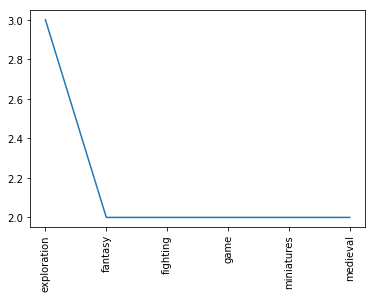

In [69]:
mwords = word_count_dict.most_common(6)
labels, values = zip(*mwords)

indexes = np.arange(len(labels))
plt.plot(indexes, values)
plt.xticks(indexes,labels,rotation=90)
plt.show()

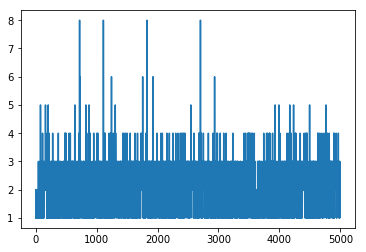

In [6]:
df['min_players'].plot()

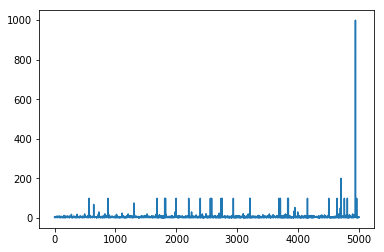

In [7]:
df['max_players'].plot()

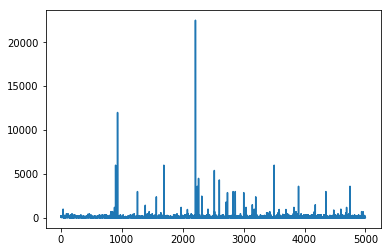

In [8]:
df['avg_time'].plot()

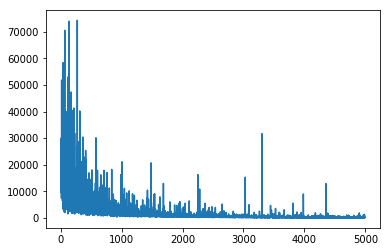

In [9]:
df['num_votes'].plot()

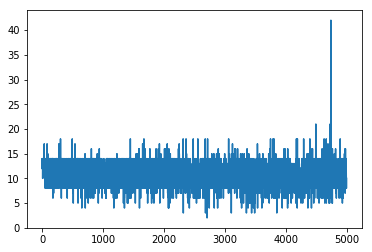

In [10]:
df['age'].plot()

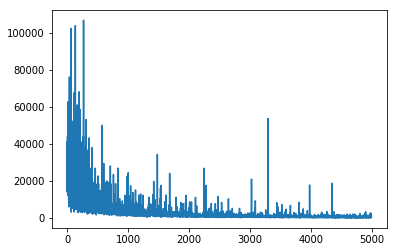

In [11]:
df['owned'].plot()

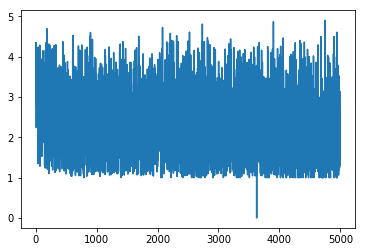

In [12]:
df['weight'].plot()

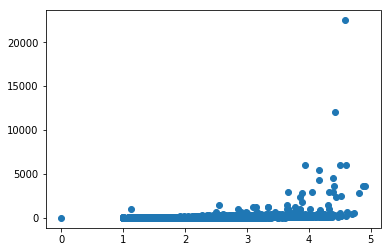

In [13]:
plt.scatter(df.weight, df.avg_time)

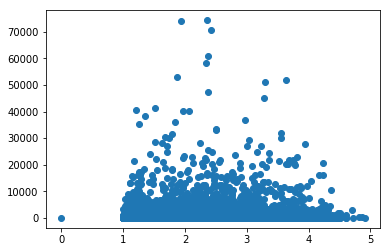

In [14]:
plt.scatter(df.weight, df.num_votes)

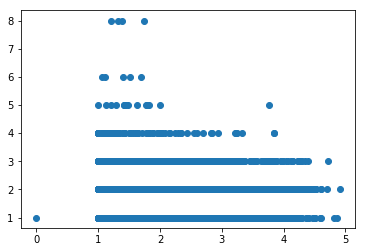

In [15]:
plt.scatter(df.weight, df.min_players)

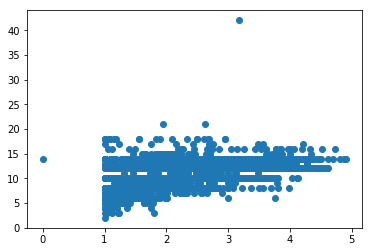

In [16]:
plt.scatter(df.weight, df.age)